In [610]:
import pandas as pd
import json

In [611]:
df = pd.read_json("results_combined.json")

In [612]:
df["results"]

0                                                  None
1                                                  None
2     {'ours_30000': {'SSIM': 0.9543762207, 'PSNR': ...
3     {'ours_30000': {'SSIM': 0.9382120371, 'PSNR': ...
4     {'ours_30000': {'SSIM': 0.9531909823, 'PSNR': ...
                            ...                        
76    {'ours_30000': {'SSIM': 0.9519387484, 'PSNR': ...
77    {'ours_30000': {'SSIM': 0.9512621760000001, 'P...
78    {'ours_30000': {'SSIM': 0.9433560371, 'PSNR': ...
79    {'ours_30000': {'SSIM': 0.9573067427, 'PSNR': ...
80    {'ours_30000': {'SSIM': 0.9570000172, 'PSNR': ...
Name: results, Length: 81, dtype: object

In [613]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_all_fitted_curves(folder_path="fitted_curves"):
    """
    Plots all the fitted curves from the .npz files in the given folder, 
    and sorts the legend in ascending order by dataset names.
    
    Parameters:
    folder_path (str): The path to the folder containing the .npz files with fitted curve data.
    """
    # Get a list of all .npz files in the folder and sort them by dataset name
    npz_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".npz")])

    # Create a plot
    plt.figure(figsize=(12, 8))
    
    for file in npz_files:
        dataset_name = os.path.splitext(file)[0].replace("fitted_curve_", "")
        file_path = os.path.join(folder_path, file)
        
        # Load the data
        data = np.load(file_path)
        x_fit = data['x_fit']
        y_fit = data['y_fit']
        
        # Plot the curve with a label
        plt.plot(x_fit, y_fit, label=dataset_name)
    
    # Sort the legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_labels_handles = sorted(zip(labels, handles), key=lambda x: x[0])
    sorted_labels, sorted_handles = zip(*sorted_labels_handles)
    
    # Add plot labels, sorted legend, and title
    plt.xlabel('Number of Gaussians')
    plt.ylabel('PSNR')
    plt.xscale('log')
    plt.title('Fitted Curves for All Scenes')
    plt.legend(sorted_handles, sorted_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Position the legend outside the plot
    plt.grid(True)

    # Save the combined plot as an image
    output_image_path = os.path.join("files", "all_fitted_curves.png")
    plt.savefig(output_image_path, bbox_inches='tight')
    plt.close()

    print(f"All fitted curves plot saved to {output_image_path}")

# Call the function to plot all fitted curves
#plot_all_fitted_curves(folder_path="/bigwork/nhmlhuer/gaussian-splatting/fitted_curves")


In [614]:
import pandas as pd
import os
# List of file paths
file_paths = [
    "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json",
    "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json",
    "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json",
    "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json"
]

dfs = []
for file_path in file_paths:
    df = pd.read_json(file_path)
    # Add a column indicating the source file
    df['source_file'] = os.path.basename(file_path)
    dfs.append(df)
    print(f"Loaded {len(df)} entries from {file_path}")

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame has {len(combined_df)} entries before filtering.")

# Convert 'PSNR' and 'num_points' to numeric, handling errors
combined_df['PSNR'] = pd.to_numeric(combined_df['PSNR'], errors='coerce')
combined_df['num_points'] = pd.to_numeric(combined_df['num_points'], errors='coerce')

# Check for any null values
print("Null values in 'PSNR':", combined_df['PSNR'].isnull().sum())
print("Null values in 'num_points':", combined_df['num_points'].isnull().sum())

# Drop NaN entries in critical columns
combined_df = combined_df.dropna(subset=['PSNR', 'num_points'])
print(f"Combined DataFrame has {len(combined_df)} entries after filtering.")
# Step 4: Create Pareto fronts for each dataset using the provided CSV files
datasets = combined_df['dataset_name'].unique()

# Directory containing the Pareto front CSV files
pareto_csv_dir = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs"
pareto_csv_dir_30k = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs_30k"

Loaded 6 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json
Loaded 24 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json
Loaded 68 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json
Loaded 20 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json
Combined DataFrame has 118 entries before filtering.
Null values in 'PSNR': 0
Null values in 'num_points': 0
Combined DataFrame has 118 entries after filtering.


In [615]:
combined_df

,dataset_name,SSIM,PSNR,num_points,meta_model,meta_reward_function,meta_base_model,meta_rl_lr,source_file,meta_complexity_penalty
0,20Puppy,0.916970,25.416317,37786,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
1,19Bear,0.928453,27.286463,37711,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
2,01Gorilla,0.877630,22.178190,36315,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
3,18Obesobeso,0.910284,25.052919,36644,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
4,01Gorilla,0.942967,30.632458,55811,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,final_eval_reinforce_pruning_pareto.json,NaN
...,...,...,...,...,...,...,...,...,...,...
113,18Obesobeso,0.951132,32.739830,76310,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,final_eval_reinforce_default_pruning_pareto.json,NaN
114,20Puppy,0.954407,31.702965,42509,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN
115,01Gorilla,0.940772,30.056236,15973,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN
116,19Bear,0.954963,32.652260,42688,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN


In [616]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define file paths along with their assigned names
file_infos = [
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json",
    #    'name': 'REINFORCE Agent Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json",
    #    'name': 'REINFORCE Agent Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json",
    #    'name': 'REINFORCE Default Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json",
    #    'name': 'REINFORCE Default Pruning'
    #},
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_per_gaussian_reward_default_pruning.json",
        'name': 'PPO per Gaussian Default Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_per_gaussian_reward_agent_pruning.json",
        'name': 'PPO per Gaussian Agent Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_ppo_default_pruning.json",
        'name': 'PPO Default Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_ppo_agent_pruning.json",
        'name': 'PPO Agent Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_random_model.json",
        'name': 'Random Model'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_base_model.json",
        'name': 'Imitation Base Model'
    }
]

In [ ]:
image_name = "legend"
dfs = []
for file_info in file_infos:
    file_path = file_info['file_path']
    name = file_info['name']
    df = pd.read_json(file_path)
    # Add columns indicating the assigned name and source file
    df['source_name'] = name
    df['source_file'] = os.path.basename(file_path)
    dfs.append(df)
    print(f"Loaded {len(df)} entries from {file_path}")

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame has {len(combined_df)} entries before filtering.")

# Convert 'PSNR' and 'num_points' to numeric, handling errors
combined_df['PSNR'] = pd.to_numeric(combined_df['PSNR'], errors='coerce')
combined_df['num_points'] = pd.to_numeric(combined_df['num_points'], errors='coerce')

# Check for any null values
print("Null values in 'PSNR':", combined_df['PSNR'].isnull().sum())
print("Null values in 'num_points':", combined_df['num_points'].isnull().sum())

# Drop NaN entries in critical columns
combined_df = combined_df.dropna(subset=['PSNR', 'num_points'])
print(f"Combined DataFrame has {len(combined_df)} entries after filtering.")

# Step 4: Create Pareto fronts for each dataset using the provided CSV files
datasets = combined_df['dataset_name'].unique()

# Directory containing the Pareto front CSV files
pareto_csv_dir = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs"
pareto_csv_dir_30k = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs_30k"

# Create a dictionary mapping the old column names to the new column names
column_mapping = {
    "meta_reward_function": "Reward function",
    "meta_base_model": "Base model",
    "meta_rl_lr": "RL learning rate",
    "source_file": "Source file",
    "meta_complexity_penalty": "Complexity penalty"
}

# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)
combined_df = combined_df[(combined_df['meta_base_model'] != 'not_exisiting')]
#combined_df = combined_df[combined_df['meta_rl_lr'] == 0.0005]#, 0.001]

Loaded 16 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_per_gaussian_reward_default_pruning.json
Loaded 31 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_per_gaussian_reward_agent_pruning.json
Loaded 192 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_ppo_default_pruning.json
Loaded 179 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_ppo_agent_pruning.json
Loaded 4 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_random_model.json
Loaded 8 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_base_model.json
Combined DataFrame has 430 entries before filtering.
Null values in 'PSNR': 0
Null values in 'num_points': 0
Combined DataFrame has 430 entries after filtering.


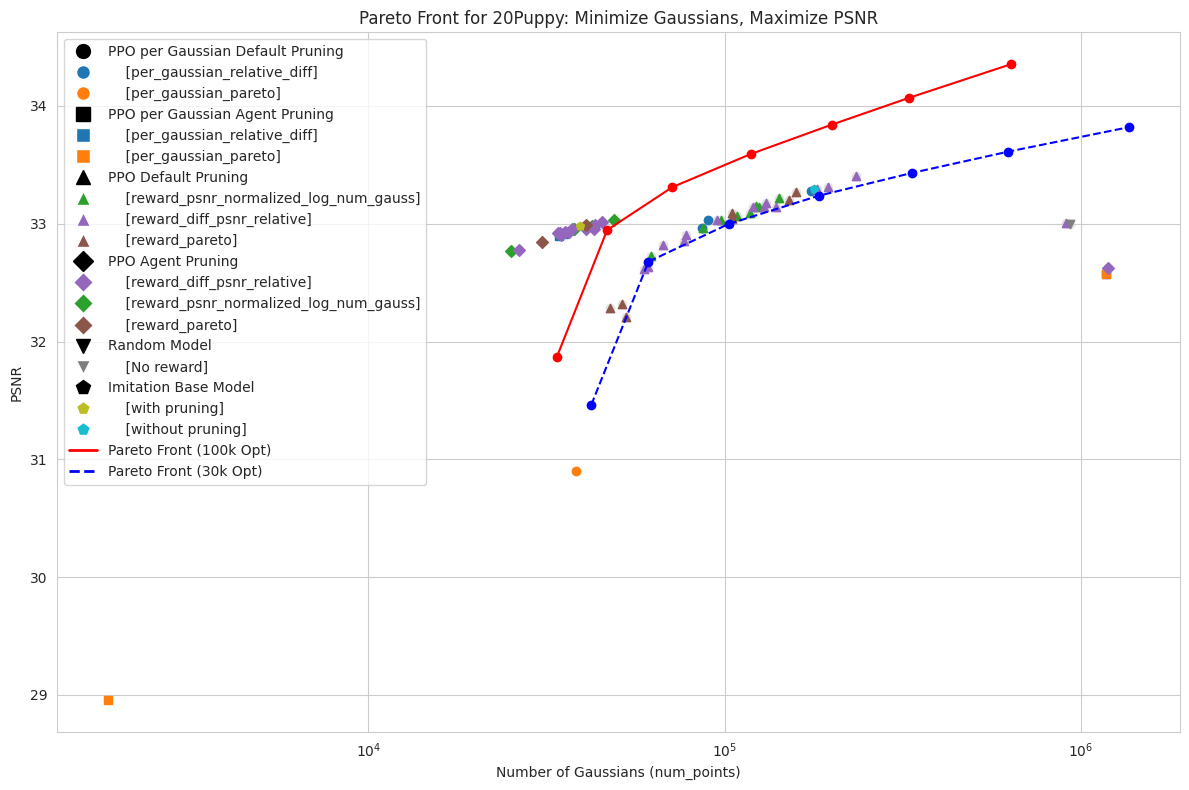

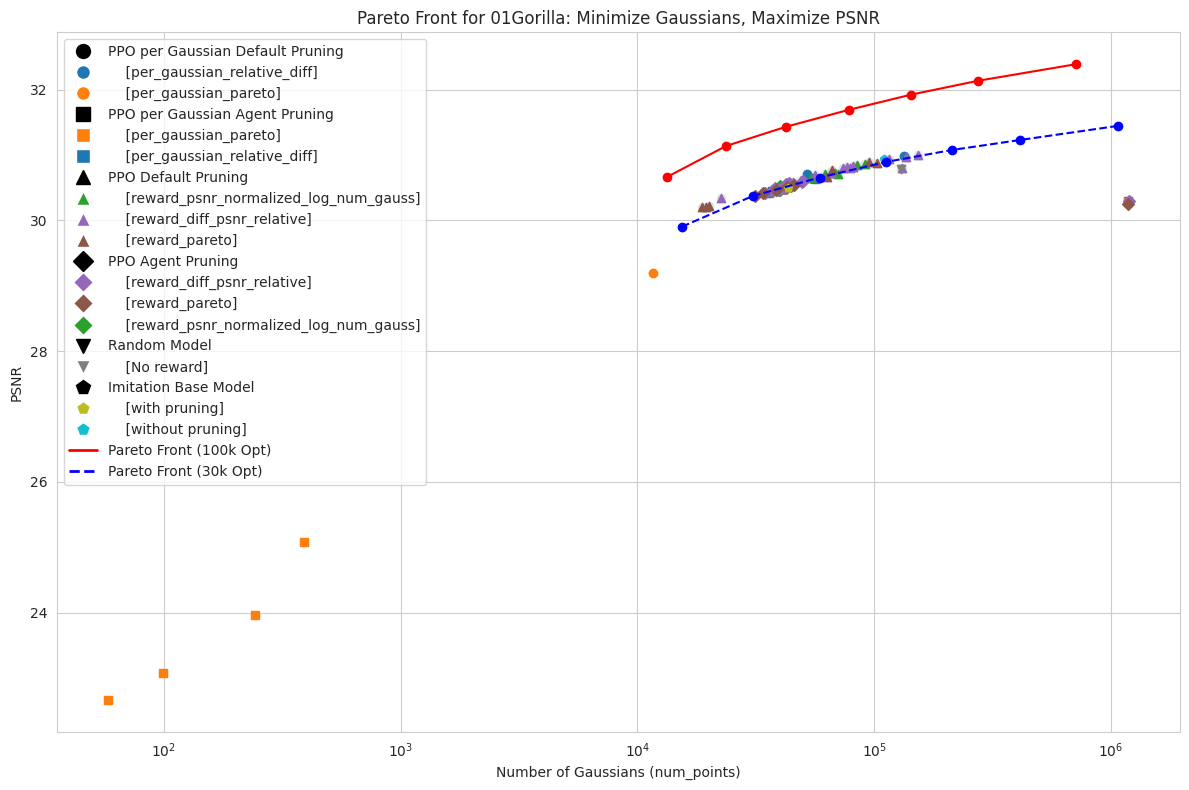

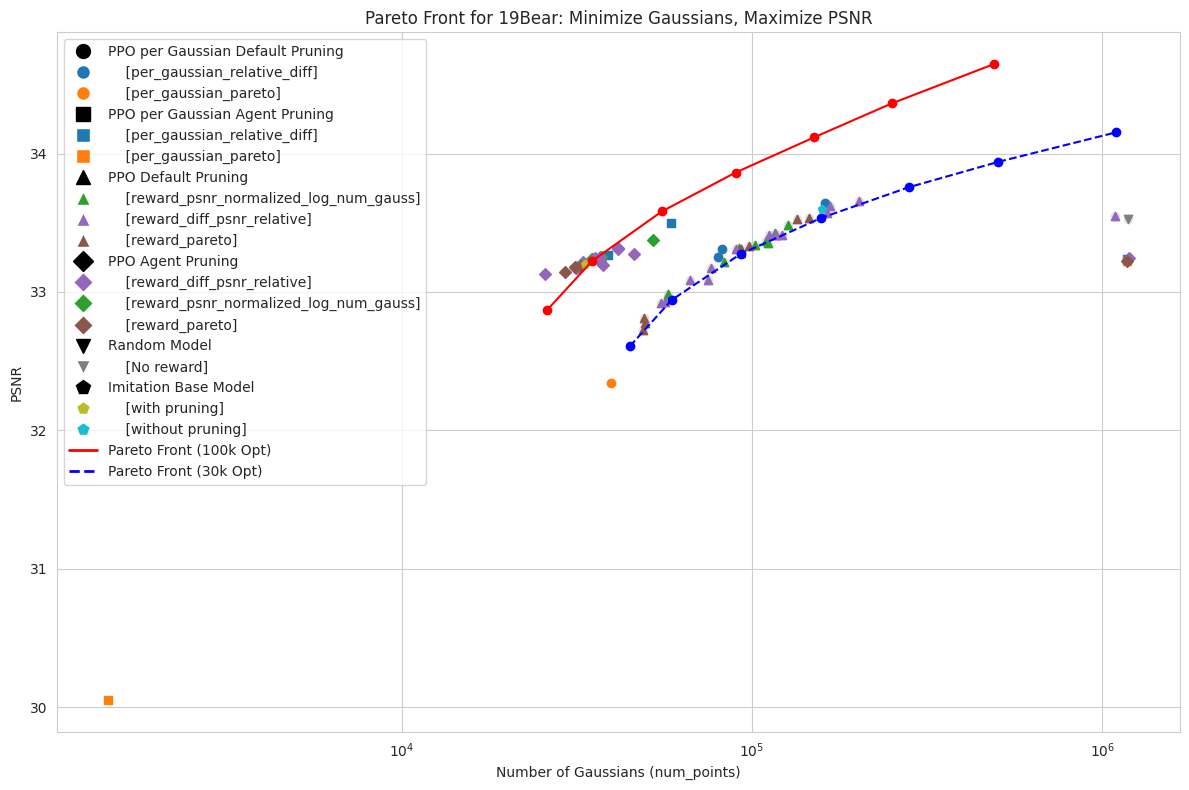

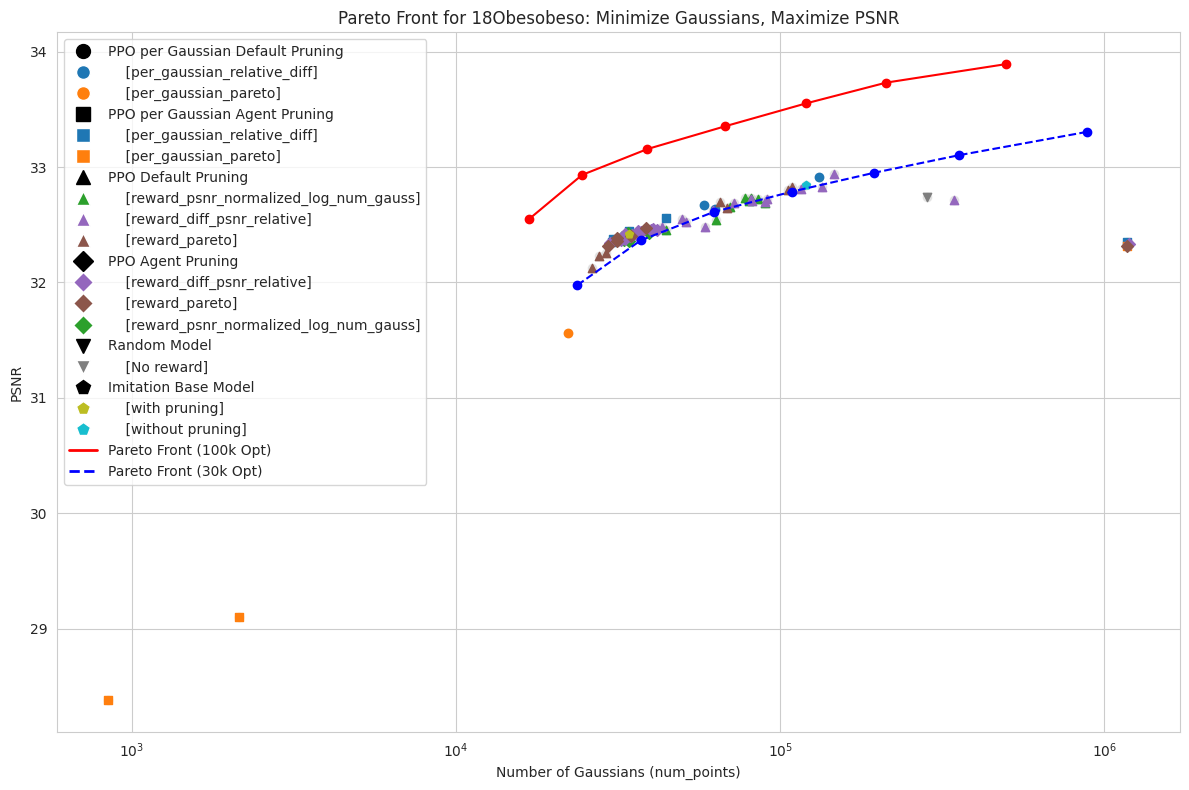

In [618]:
from itertools import product
for dataset_name in datasets:
    # Subset the DataFrame for the current dataset
    df_dataset = combined_df[combined_df['dataset_name'] == dataset_name]
    
    # Read the Pareto front data from the first CSV file
    pareto_csv_file = os.path.join(pareto_csv_dir, f"{dataset_name}.csv")
    if os.path.exists(pareto_csv_file):
        pareto_df = pd.read_csv(pareto_csv_file)
    else:
        print(f"Pareto CSV file not found for dataset {dataset_name} at {pareto_csv_file}")
        pareto_df = pd.DataFrame()
    
    # Read the Pareto front data from the 30k optimization CSV file
    pareto_csv_file_30k = os.path.join(pareto_csv_dir_30k, f"{dataset_name}.csv")
    if os.path.exists(pareto_csv_file_30k):
        pareto_df_30k = pd.read_csv(pareto_csv_file_30k)
    else:
        print(f"30k Pareto CSV file not found for dataset {dataset_name} at {pareto_csv_file_30k}")
        pareto_df_30k = pd.DataFrame()
    
    # Ensure columns are correctly named and types are correct
    for df_pareto in [pareto_df, pareto_df_30k]:
        df_pareto['PSNR'] = pd.to_numeric(df_pareto['PSNR'], errors='coerce')
        df_pareto['num_points'] = pd.to_numeric(df_pareto['num_points'], errors='coerce')
        df_pareto.dropna(subset=['PSNR', 'num_points'], inplace=True)
        df_pareto.sort_values(by='num_points', inplace=True)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot all points in grey for context
    plt.scatter(df_dataset['num_points'], df_dataset['PSNR'], color='lightgrey', label='All Points', alpha=0.5)
    
    # Get unique assigned names and reward functions
    unique_names = df_dataset['source_name'].unique()
    unique_rewards = df_dataset['meta_reward_function'].unique()
    
    # Generate a color map for reward functions
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(unique_rewards)))
    color_map = dict(zip(unique_rewards, colors))
    
    # Define markers for assigned names (extend markers list if needed)
    markers_list = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '+', 'x']
    marker_map = dict(zip(unique_names, markers_list))
    
    # Plot points for each combination of source_name and reward_function
    for (source_name, reward_function) in product(unique_names, unique_rewards):
        df_subset = df_dataset[
            (df_dataset['source_name'] == source_name) &
            (df_dataset['meta_reward_function'] == reward_function)
        ]
        if not df_subset.empty:
            plt.scatter(
                df_subset['num_points'], df_subset['PSNR'],
                color=color_map[reward_function],
                marker=marker_map[source_name],
                label=f"{source_name}_{reward_function}"
            )
    
    # Plot Pareto front from the first CSV file
    if not pareto_df.empty:
        plt.scatter(pareto_df['num_points'], pareto_df['PSNR'], color='red', label='Pareto Front (Full Opt)', zorder=5)
        plt.plot(pareto_df['num_points'], pareto_df['PSNR'], color='red', linestyle='-', zorder=5)
    else:
        print(f"No Pareto data available for dataset {dataset_name} in {pareto_csv_dir}")
    
    # Plot Pareto front from the 30k optimization CSV file
    if not pareto_df_30k.empty:
        plt.scatter(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', label='Pareto Front (30k Opt)', zorder=5)
        plt.plot(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', linestyle='--', zorder=5)
    else:
        print(f"No 30k Pareto data available for dataset {dataset_name} in {pareto_csv_dir_30k}")
    
    # Customize the plot
    plt.title(f'Pareto Front for {dataset_name}: Minimize Gaussians, Maximize PSNR')
    plt.xscale('log')
    plt.xlabel('Number of Gaussians (num_points)')
    plt.ylabel('PSNR')
    plt.grid(True)
    
    # Create custom legend entries
    from matplotlib.lines import Line2D

    # Prepare legend elements
    legend_elements = []
    # First, add method entries
    for name in unique_names:
        marker = marker_map[name]
        legend_elements.append(Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10))

        # Now, add reward functions under this method
        method_rewards = df_dataset[df_dataset['source_name'] == name]['meta_reward_function'].unique()
        for reward in method_rewards:
            color = color_map[reward]
            # Indent the label to simulate hierarchy
            label = f"    {reward}"  # Indent with spaces
            legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10))

    # Pareto fronts legend entries
    pareto_legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Pareto Front (100k Opt)'),
        Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Pareto Front (30k Opt)')
    ]

    # Combine all legend elements
    all_legend_elements = legend_elements + pareto_legend_elements

    # Add legends to the plot
    plt.legend(handles=all_legend_elements)
    plt.tight_layout()
    #output_path = f"files/{image_name}_{dataset_name}.png"
    #plt.savefig(output_path)
    plt.show()

In [619]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# ... [Your existing code for loading and processing data] ...

from itertools import product
for dataset_name in datasets:
    # Subset the DataFrame for the current dataset
    df_dataset = combined_df[combined_df['dataset_name'] == dataset_name]
    
    # ... [Your existing code for reading Pareto CSV files] ...
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot all points in grey for context
    plt.scatter(df_dataset['num_points'], df_dataset['PSNR'], color='lightgrey', label='All Points', alpha=0.5)
    
    # Get unique assigned names and reward functions
    unique_names = df_dataset['source_name'].unique()
    unique_rewards = df_dataset['meta_reward_function'].unique()
    
    # Generate a color map for reward functions
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(unique_rewards)))
    color_map = dict(zip(unique_rewards, colors))
    
    # Define markers for assigned names (extend markers list if needed)
    markers_list = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '+', 'x']
    marker_map = dict(zip(unique_names, markers_list))
    
    # Plot points for each combination of source_name and reward_function
    for (source_name, reward_function) in product(unique_names, unique_rewards):
        df_subset = df_dataset[
            (df_dataset['source_name'] == source_name) &
            (df_dataset['meta_reward_function'] == reward_function)
        ]
        if not df_subset.empty:
            plt.scatter(
                df_subset['num_points'], df_subset['PSNR'],
                color=color_map[reward_function],
                marker=marker_map[source_name],
                label=f"{source_name}_{reward_function}"
            )
    
    # Plot Pareto fronts
    if not pareto_df.empty:
        plt.scatter(pareto_df['num_points'], pareto_df['PSNR'], color='red', label='Pareto Front (100k Opt)', zorder=5)
        plt.plot(pareto_df['num_points'], pareto_df['PSNR'], color='red', linestyle='-', zorder=5)
    else:
        print(f"No Pareto data available for dataset {dataset_name} in {pareto_csv_dir}")
    
    if not pareto_df_30k.empty:
        plt.scatter(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', label='Pareto Front (30k Opt)', zorder=5)
        plt.plot(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', linestyle='--', zorder=5)
    else:
        print(f"No 30k Pareto data available for dataset {dataset_name} in {pareto_csv_dir_30k}")
    
    # Customize the plot
    plt.title(f'Pareto Front for {dataset_name}: Minimize Gaussians, Maximize PSNR')
    plt.xscale('log')
    plt.xlabel('Number of Gaussians (num_points)')
    plt.ylabel('PSNR')
    plt.grid(True)
    
    # Save the plot without legend
    output_path = f"files/{image_name}_{dataset_name}.png"
    plt.savefig(output_path, bbox_inches='tight')
    plt.close()  # Close the figure to free memory
    
    # Prepare legend elements
    method_elements = []
    reward_elements = []
    for name in unique_names:
        marker = marker_map[name]
        method_handle = Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10)
        method_elements.append(method_handle)

        # Add reward functions under this method
        method_rewards = df_dataset[df_dataset['source_name'] == name]['meta_reward_function'].unique()
        for reward in method_rewards:
            color = color_map[reward]
            label = f"{reward}"
            handle = Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10)
            reward_elements.append(handle)
    
    # Pareto fronts legend entries
    pareto_legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Pareto Front (100k Opt)'),
        Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Pareto Front (30k Opt)')
    ]
    
    # Now, create a separate figure for the legend
    legend_fig = plt.figure(figsize=(12, 6))
    
    # Calculate the number of columns: one for each method, plus one for Pareto legends
    num_methods = len(unique_names)
    total_columns = num_methods + 1  # +1 for Pareto legends
    
    # Create gridspec for the legend figure
    gs = gridspec.GridSpec(1, total_columns, width_ratios=[1]*total_columns)
    
    # Create an axis for each method
    axes_methods = []
    for i in range(num_methods):
        ax = legend_fig.add_subplot(gs[i])
        ax.axis('off')
        axes_methods.append(ax)
    
    # Create an axis for Pareto legends
    ax_pareto = legend_fig.add_subplot(gs[-1])
    ax_pareto.axis('off')
    
    # Now, for each method, create a legend
    for ax, name in zip(axes_methods, unique_names):
        marker = marker_map[name]
        method_handle = Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10)
        method_rewards = df_dataset[df_dataset['source_name'] == name]['meta_reward_function'].unique()
        reward_handles = []
        for reward in method_rewards:
            color = color_map[reward]
            label = f"{reward}"
            handle = Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10)
            reward_handles.append(handle)
        handles = [method_handle] + reward_handles
        labels = [h.get_label() for h in handles]
        ax.legend(handles=handles, labels=labels, loc='center', frameon=False)
    
    # Create legend for Pareto fronts
    handles_pareto = pareto_legend_elements
    labels_pareto = [h.get_label() for h in handles_pareto]
    ax_pareto.legend(handles=handles_pareto, labels=labels_pareto, loc='center', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the legend figure
    output_legend_path = f"files/ppo_{image_name}_legend_{dataset_name}.png"
    legend_fig.savefig(output_legend_path, bbox_inches='tight')
    plt.close(legend_fig)  # Close the legend figure to free memory


/tmp/ipykernel_536423/3795234711.py:139: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


In [620]:
combined_df
# Get the minimum and maximum values
min_num_points = combined_df['num_points'].min()
median_num_points = combined_df['num_points'].median()
max_num_points = combined_df['num_points'].max()

print(f"Minimum num_points: {min_num_points}")
print(f"Maximum num_points: {max_num_points}")
print(f"Mean num_points: {median_num_points}")

Minimum num_points: 58
Maximum num_points: 1191631
Mean num_points: 51278.5


In [621]:
combined_df["meta_reward_function"].unique()

array(['[per_gaussian_relative_diff]', '[per_gaussian_pareto]',
       '[reward_psnr_normalized_log_num_gauss]',
       '[reward_diff_psnr_relative]', '[reward_pareto]', '[No reward]',
       '[with pruning]', '[without pruning]'], dtype=object)

In [622]:
combined_df = combined_df[
    (combined_df['meta_reward_function'] != '[no_reward]') 
    #(combined_df['meta_reward_function'] == '[reward_diff_psnr_relative]') &
    #(combined_df['meta_base_model'] != 'not_exisiting')
    #(combined_df['meta_base_model'] == '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_no_pruning_model_long.torch')
    #(combined_df['num_points'] > 200000)
    #(combined_df['meta_complexity_penalty'] == 0.01)
    #(combined_df['meta_model'] == '/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/final_train_ppo_agent_pruning/18-12-22/25')
]
filtered_df = combined_df
filtered_df["meta_model"]
# Display the filtered DataFrame
display(filtered_df)

# Get the unique meta_model(s)
meta_models = filtered_df['meta_model'].unique()
print("Meta Models:")
for model in meta_models:
    print(model)

,dataset_name,SSIM,PSNR,num_points,meta_model,meta_reward_function,meta_base_model,meta_rl_lr,meta_clip_param,meta_ppo_update_frequency,source_name,source_file,meta_complexity_penalty,base_model
0,20Puppy,0.957684,33.035065,89893,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[per_gaussian_relative_diff],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0005,0.2,3.0,PPO per Gaussian Default Pruning,final_eval_per_gaussian_reward_default_pruning...,NaN,NaN
1,01Gorilla,0.943562,30.717628,51972,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[per_gaussian_relative_diff],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0005,0.2,3.0,PPO per Gaussian Default Pruning,final_eval_per_gaussian_reward_default_pruning...,NaN,NaN
2,19Bear,0.956316,33.310879,82348,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[per_gaussian_relative_diff],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0005,0.2,3.0,PPO per Gaussian Default Pruning,final_eval_per_gaussian_reward_default_pruning...,NaN,NaN
3,18Obesobeso,0.950974,32.675591,58177,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[per_gaussian_relative_diff],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0005,0.2,3.0,PPO per Gaussian Default Pruning,final_eval_per_gaussian_reward_default_pruning...,NaN,NaN
4,18Obesobeso,0.950887,32.636215,62854,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[per_gaussian_relative_diff],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,0.2,7.0,PPO per Gaussian Default Pruning,final_eval_per_gaussian_reward_default_pruning...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,20Puppy,0.956612,32.982426,39343,NaN,[with pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,NaN,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
426,19Bear,0.956948,33.596523,158286,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,NaN,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
427,01Gorilla,0.944655,30.932281,110247,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,NaN,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
428,20Puppy,0.958262,33.297985,178149,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,NaN,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN


Meta Models:
/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-11-20/19-45-47/14/meta_model.torch
/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-11-20/19-45-47/11/meta_model.torch
/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-11-20/19-45-47/5/meta_model.torch
/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-11-20/19-45-47/12/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/6/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/10/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/13/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/3/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/7/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/11/meta_model.torch
/bigwork/nhmlhuer/git/backu

In [623]:
# Calculate the mean, std, and count for 'psnr' and 'num_points' grouped by 'meta_reward_function'
result = filtered_df.groupby('meta_reward_function').agg(
    num_runs=('meta_reward_function', 'count'),
    mean_psnr=('PSNR', 'mean'),
    std_psnr=('PSNR', 'std'),
    median_num_points=('num_points', 'median'),
    mean_num_points=('num_points', 'mean'),
    std_num_points=('num_points', 'std')
).reset_index()
result

,meta_reward_function,num_runs,mean_psnr,std_psnr,median_num_points,mean_num_points,std_num_points
0,[No reward],4,32.514921,1.195632,607686.5,632957.500000,507594.983036
1,[per_gaussian_pareto],16,28.979997,3.485165,6867.5,301880.062500,522488.305704
2,[per_gaussian_relative_diff],31,32.327896,1.102828,56276.0,208315.161290,381268.912173
3,[reward_diff_psnr_relative],112,32.326786,1.062879,50575.0,128481.375000,245254.926410
4,[reward_pareto],46,32.135334,1.110309,49071.0,133968.239130,281298.884114
5,[reward_psnr_normalized_log_num_gauss],57,32.321813,1.072511,57544.0,65836.842105,31463.981632
6,[with pruning],4,32.277114,1.227448,36733.5,37537.250000,4693.367972
7,[without pruning],4,32.668322,1.197722,139054.5,141626.250000,31997.383116


In [624]:
# Define the datasets and meta_base_models you're interested in
datasets = ['18Obesobeso', '19Bear', '20Puppy', '01Gorilla']
meta_base_models = [
    '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch',
    '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_no_pruning_model_long.torch'
]

# Initialize a dictionary to store the results
results = {}

# Loop over each meta_base_model
for base_model in meta_base_models:
    # Filter the DataFrame for the current base_model
    df_base = filtered_df[filtered_df['meta_base_model'] == base_model]
    
    # Group by meta_model
    grouped = df_base.groupby('meta_model')
    
    # For each meta_model, check if it has runs for all datasets
    for meta_model, group in grouped:
        datasets_in_group = group['dataset_name'].unique()
        
        # Check if all required datasets are present
        if set(datasets).issubset(set(datasets_in_group)):
            print(f"Meta_model: {meta_model} with base_model: {base_model} has runs for all datasets.")
            # Store the runs for further analysis
            results[(base_model, meta_model)] = group
            # Since you only need one such meta_model per base_model, you can break here if desired
            # break  # Uncomment if you want to stop after finding the first matching meta_model
    else:
        # If no meta_model was found with runs for all datasets
        print(f"No meta_model with runs for all datasets was found for base_model: {base_model}")


Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/1/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/10/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/11/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-11-20/19-45-44/13/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun

In [625]:
def reward_pareto(row):
    psnr = row['PSNR']
    num_points = row['num_points']
    dataset_name = row['dataset_name']
    
    # Load the fitted curve data
    fitted_curve_file = f"/bigwork/nhmlhuer/gaussian-splatting/fitted_curves/fitted_curve_{dataset_name}.npz"
    try:
        data = np.load(fitted_curve_file)
        x_fit = data['x_fit']
        y_fit = data['y_fit']
    except FileNotFoundError:
        raise ValueError(f"Fitted curve file for dataset '{dataset_name}' not found at {fitted_curve_file}")
    
    # Interpolate the PSNR from the fitted curve
    psnr_curve = np.interp(num_points, x_fit, y_fit)
    
    # Calculate the PSNR distance
    psnr_distance = np.abs(psnr - psnr_curve)
    
    return psnr_distance
# Apply the function to each row
combined_df['psnr_distance'] = combined_df.apply(reward_pareto, axis=1)
# Filter out rows where 'meta_reward_function' is in the specified list
excluded_rewards = ['[No reward]', '[with pruning]', '[without pruning]']
combined_df = combined_df[~combined_df['meta_reward_function'].isin(excluded_rewards)]
# Define a mapping of old names to new names
rename_mapping = {
    "[per_gaussian_relative_diff]": "Per Gaussian",
    "[per_gaussian_pareto]": "Per Gaussian",
    "[reward_psnr_normalized_log_num_gauss]": "PSNR",
    "[reward_diff_psnr_relative]": "Relative Difference",
    "[reward_pareto]": "Pareto"
}

# Apply the mapping to the 'meta_reward_functions' column
combined_df['meta_reward_function'] = combined_df['meta_reward_function'].replace(rename_mapping)



/tmp/ipykernel_536423/251348577.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['meta_reward_function'] = combined_df['meta_reward_function'].replace(rename_mapping)


/tmp/ipykernel_536423/3902324946.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_536423/3902324946.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_536423/3902324946.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_536423/3902324946.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_536423/3902324946.py:29: FutureWa

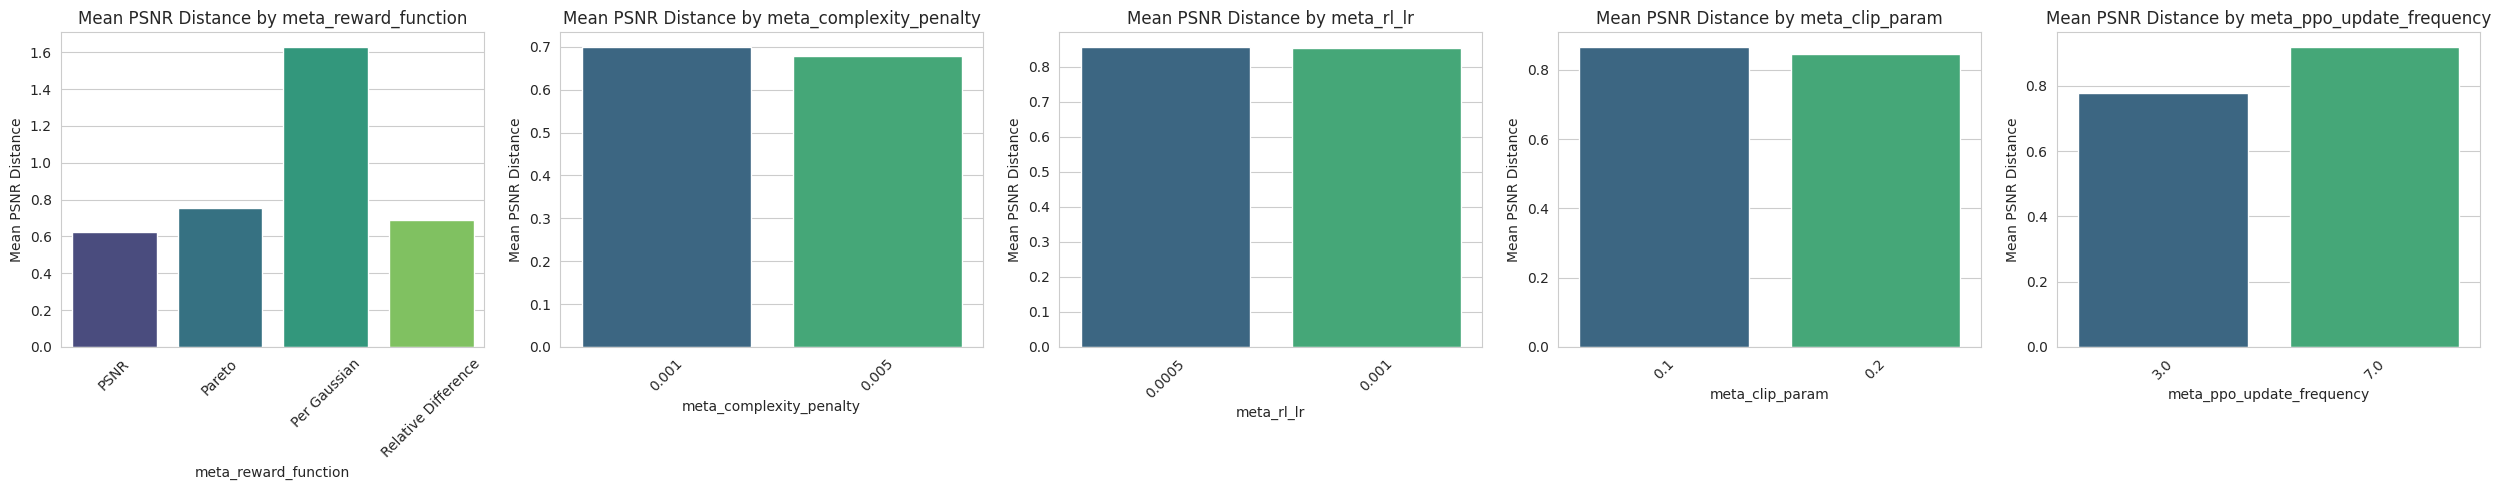

In [626]:
#  Compute Mean PSNR Distance for Each Parameter Value
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of parameters to analyze
parameters = ['meta_reward_function', 'meta_complexity_penalty', 'meta_rl_lr', 'meta_clip_param', 'meta_ppo_update_frequency']

# Dictionary to store mean PSNR distances
mean_psnr_per_value = {}

for param in parameters:
    # Group by the parameter and compute mean PSNR distance
    mean_psnr = combined_df.groupby(param)['psnr_distance'].mean().reset_index()
    mean_psnr_per_value[param] = mean_psnr

# Set up the plotting environment
sns.set_style('whitegrid')

# Number of parameters
n_params = len(parameters)
fig, axes = plt.subplots(1, n_params, figsize=(5 * n_params, 5))

# Iterate over parameters and create bar plots
for i, param in enumerate(parameters):
    ax = axes[i] if n_params > 1 else axes
    mean_psnr = mean_psnr_per_value[param]
    
    sns.barplot(
        x=param,
        y='psnr_distance',
        data=mean_psnr,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(f'Mean PSNR Distance by {param}')
    ax.set_ylabel('Mean PSNR Distance')
    ax.set_xlabel(param)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_536423/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


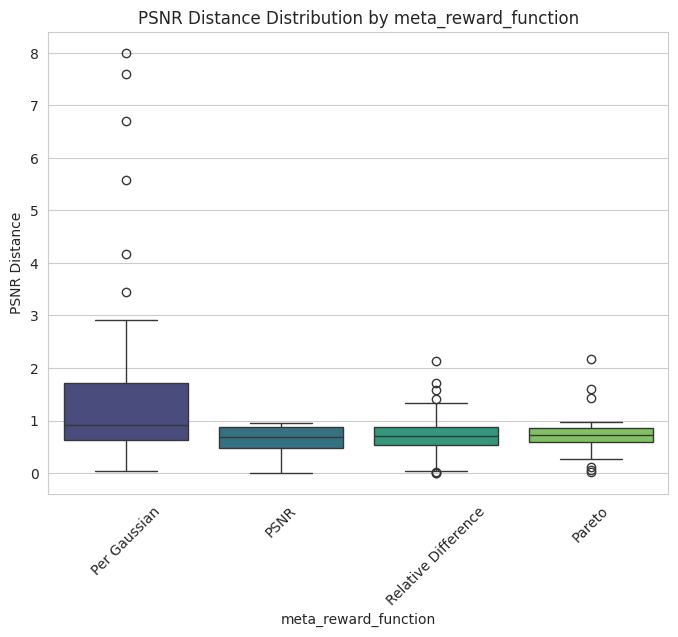

/tmp/ipykernel_536423/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


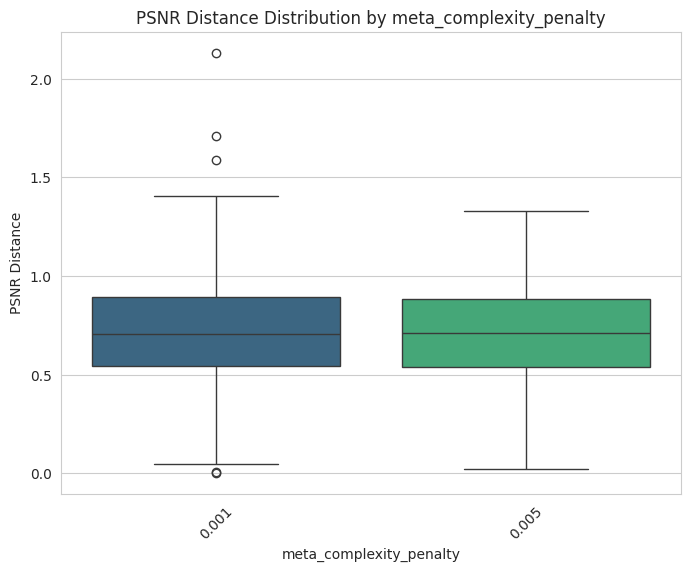

/tmp/ipykernel_536423/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


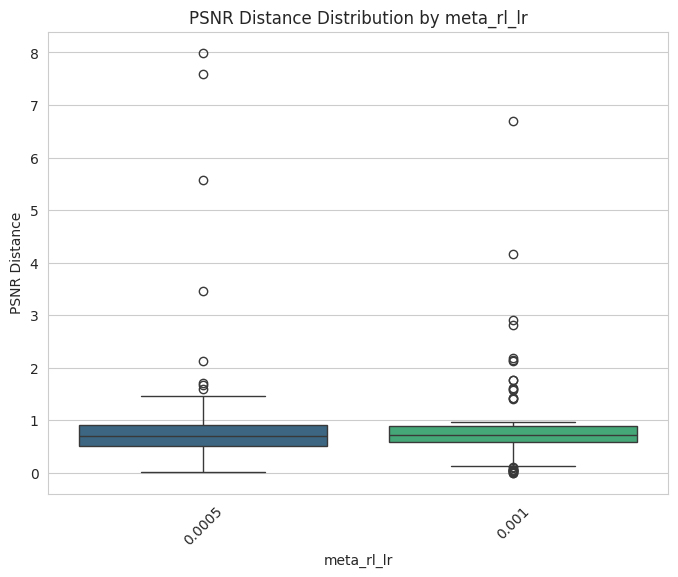

/tmp/ipykernel_536423/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


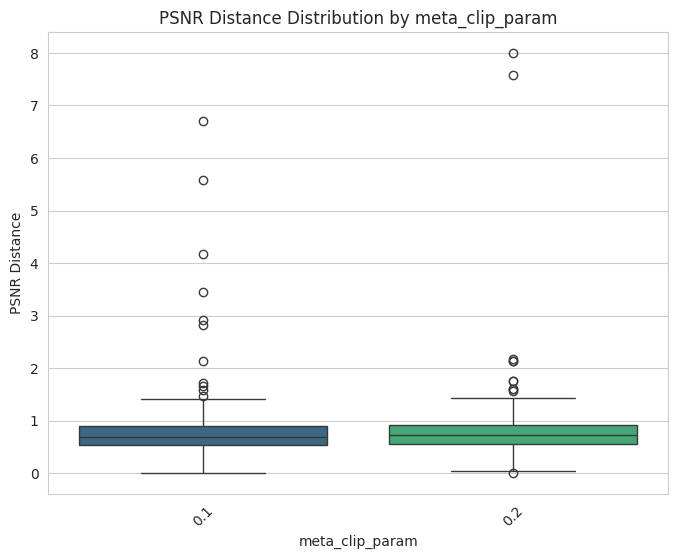

/tmp/ipykernel_536423/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


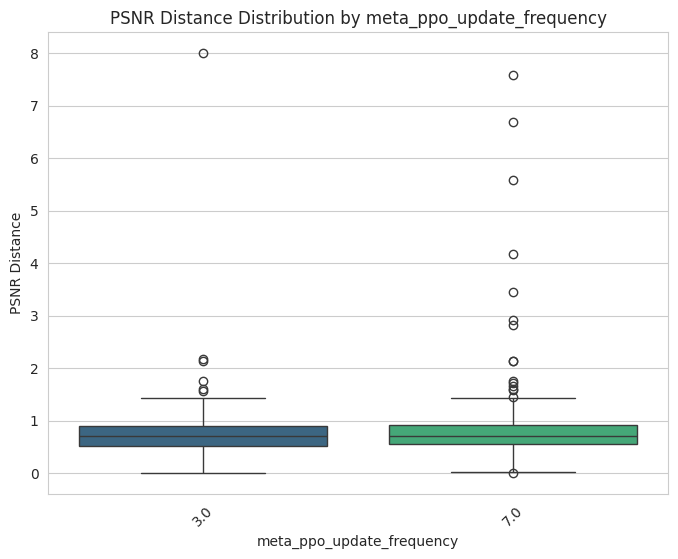

In [627]:
# Iterate over parameters and create box plots
for param in parameters:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x=param,
        y='psnr_distance',
        data=combined_df,
        palette='viridis'
    )
    plt.title(f'PSNR Distance Distribution by {param}')
    plt.ylabel('PSNR Distance')
    plt.xlabel(param)
    plt.xticks(rotation=45)
    plt.show()

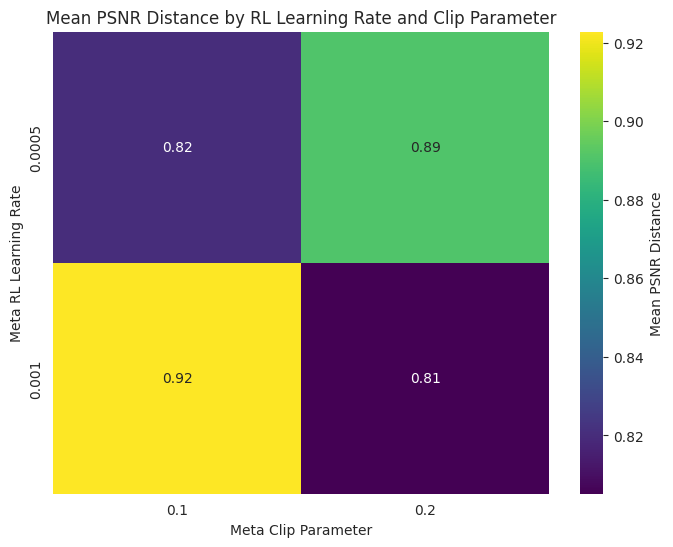

In [628]:
# Create a pivot table
pivot_table = combined_df.pivot_table(
    values='psnr_distance',
    index='meta_rl_lr',
    columns='meta_clip_param',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar_kws={'label': 'Mean PSNR Distance'}
)
plt.title('Mean PSNR Distance by RL Learning Rate and Clip Parameter')
plt.ylabel('Meta RL Learning Rate')
plt.xlabel('Meta Clip Parameter')
plt.show()

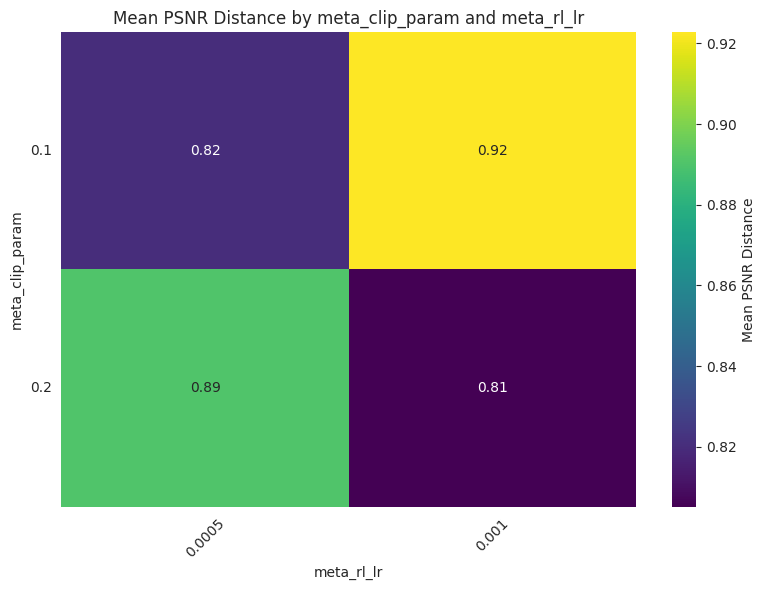

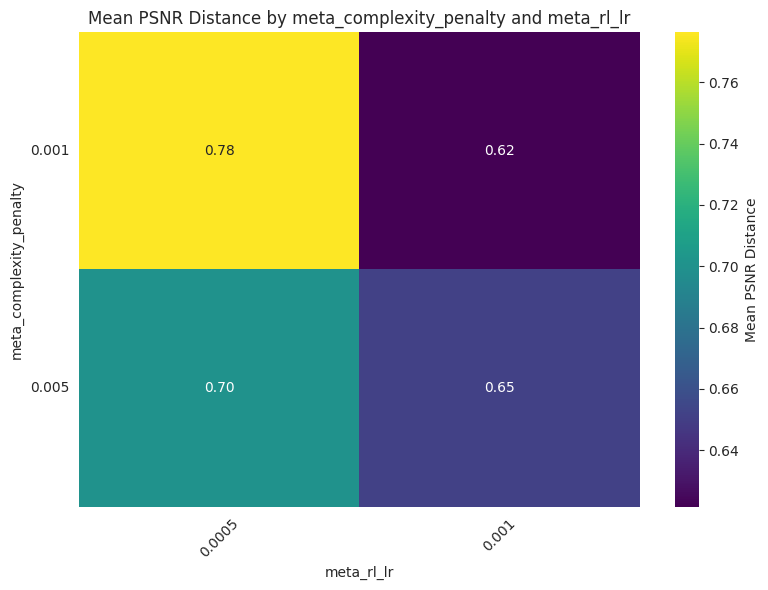

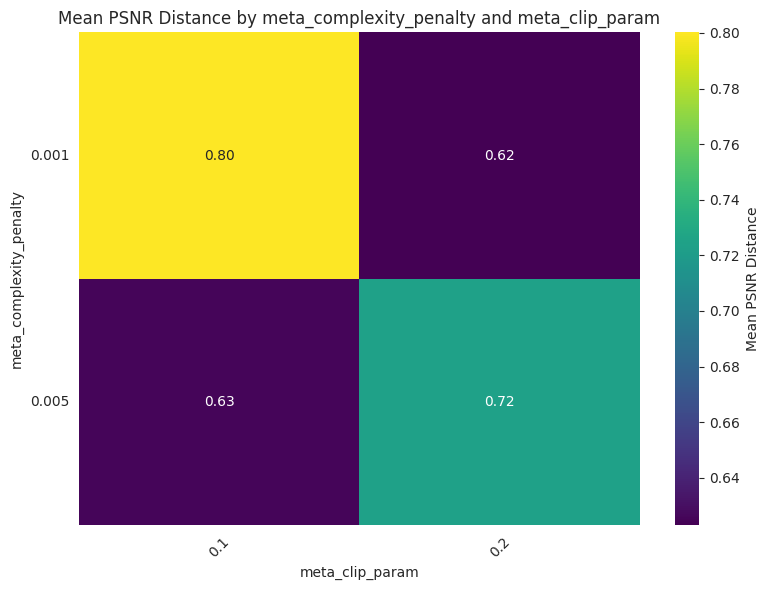

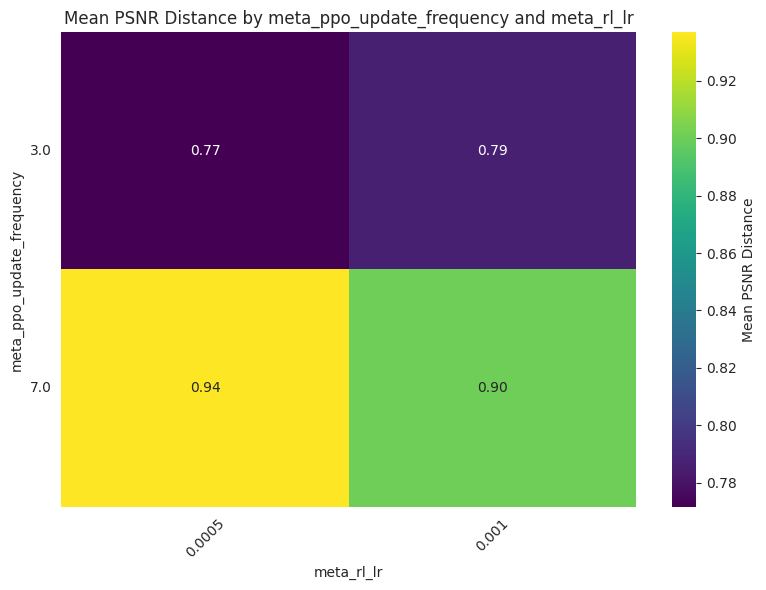

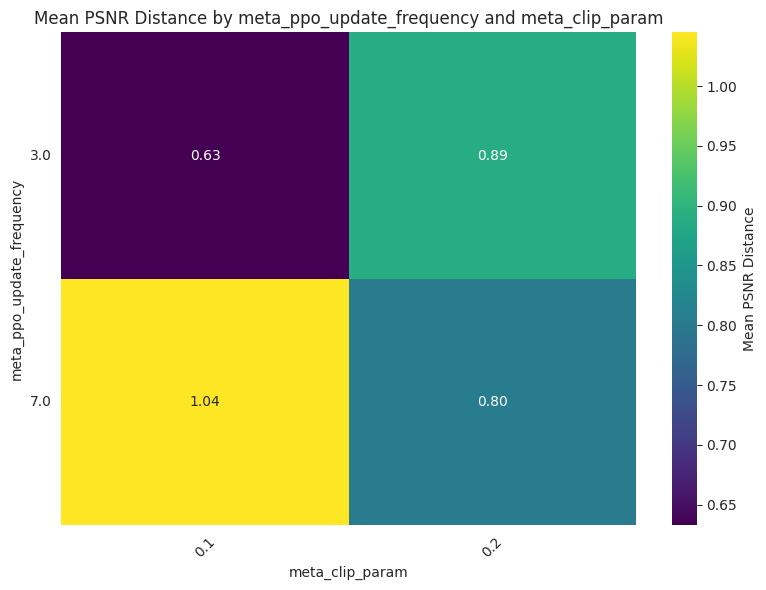

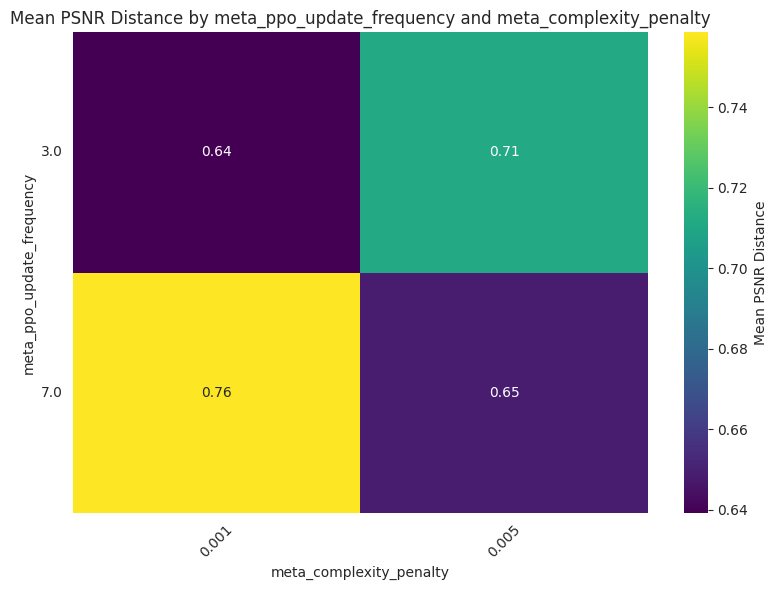

In [629]:
# List of parameter combinations
param_combinations = [
    ('meta_rl_lr', 'meta_clip_param'),
    ('meta_rl_lr', 'meta_complexity_penalty'),
    ('meta_clip_param', 'meta_complexity_penalty'),
    ('meta_rl_lr', 'meta_ppo_update_frequency'),
    ('meta_clip_param', 'meta_ppo_update_frequency'),
    ('meta_complexity_penalty', 'meta_ppo_update_frequency')
]

# Set up the plotting environment
sns.set_style('whitegrid')

# Iterate over parameter combinations
for idx, (param_x, param_y) in enumerate(param_combinations):
    # Create a pivot table
    pivot_table = combined_df.pivot_table(
        values='psnr_distance',
        index=param_y,
        columns=param_x,
        aggfunc='mean'
    )
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap='viridis',
        cbar_kws={'label': 'Mean PSNR Distance'}
    )
    plt.title(f'Mean PSNR Distance by {param_y} and {param_x}')
    plt.ylabel(param_y)
    plt.xlabel(param_x)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [630]:
# Dictionary to store the best combinations
best_combinations = {}

# Iterate over parameter combinations
for idx, (param_x, param_y) in enumerate(param_combinations):
    # Create a pivot table
    pivot_table = combined_df.pivot_table(
        values='psnr_distance',
        index=param_y,
        columns=param_x,
        aggfunc='mean'
    )
    
    # Find the minimum mean PSNR distance in the pivot table
    min_value = pivot_table.min().min()
    min_coords = pivot_table.stack().idxmin()
    best_param_x = min_coords[1]
    best_param_y = min_coords[0]
    
    # Store the best combination
    best_combinations[(param_x, param_y)] = {
        'mean_psnr_distance': min_value,
        param_x: best_param_x,
        param_y: best_param_y
    }

In [631]:
print("Best Parameter Combinations for Each Pair:")
for params, results in best_combinations.items():
    param_x, param_y = params
    print(f"\nCombination: {param_y} and {param_x}")
    print(f"Lowest Mean PSNR Distance: {results['mean_psnr_distance']:.2f}")
    print(f"Best {param_x}: {results[param_x]}")
    print(f"Best {param_y}: {results[param_y]}")

Best Parameter Combinations for Each Pair:

Combination: meta_clip_param and meta_rl_lr
Lowest Mean PSNR Distance: 0.81
Best meta_rl_lr: 0.001
Best meta_clip_param: 0.2

Combination: meta_complexity_penalty and meta_rl_lr
Lowest Mean PSNR Distance: 0.62
Best meta_rl_lr: 0.001
Best meta_complexity_penalty: 0.001

Combination: meta_complexity_penalty and meta_clip_param
Lowest Mean PSNR Distance: 0.62
Best meta_clip_param: 0.2
Best meta_complexity_penalty: 0.001

Combination: meta_ppo_update_frequency and meta_rl_lr
Lowest Mean PSNR Distance: 0.77
Best meta_rl_lr: 0.0005
Best meta_ppo_update_frequency: 3.0

Combination: meta_ppo_update_frequency and meta_clip_param
Lowest Mean PSNR Distance: 0.63
Best meta_clip_param: 0.1
Best meta_ppo_update_frequency: 3.0

Combination: meta_ppo_update_frequency and meta_complexity_penalty
Lowest Mean PSNR Distance: 0.64
Best meta_complexity_penalty: 0.001
Best meta_ppo_update_frequency: 3.0


In [632]:
import scipy.stats as stats

# Perform ANOVA for each parameter
for param in parameters:
    groups = [group['psnr_distance'].values for name, group in combined_df.groupby(param)]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA for {param}: F = {f_val:.2f}, p = {p_val:.4f}")

ANOVA for meta_reward_function: F = 16.10, p = 0.0000
ANOVA for meta_complexity_penalty: F = 0.11, p = 0.7439
ANOVA for meta_rl_lr: F = 0.00, p = 0.9836
ANOVA for meta_clip_param: F = 0.03, p = 0.8584
ANOVA for meta_ppo_update_frequency: F = 1.50, p = 0.2220


/tmp/ipykernel_536423/763791970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['normalized_psnr_distance'] = (combined_df['psnr_distance'] - combined_df['psnr_distance'].min()) / (combined_df['psnr_distance'].max() - combined_df['psnr_distance'].min())


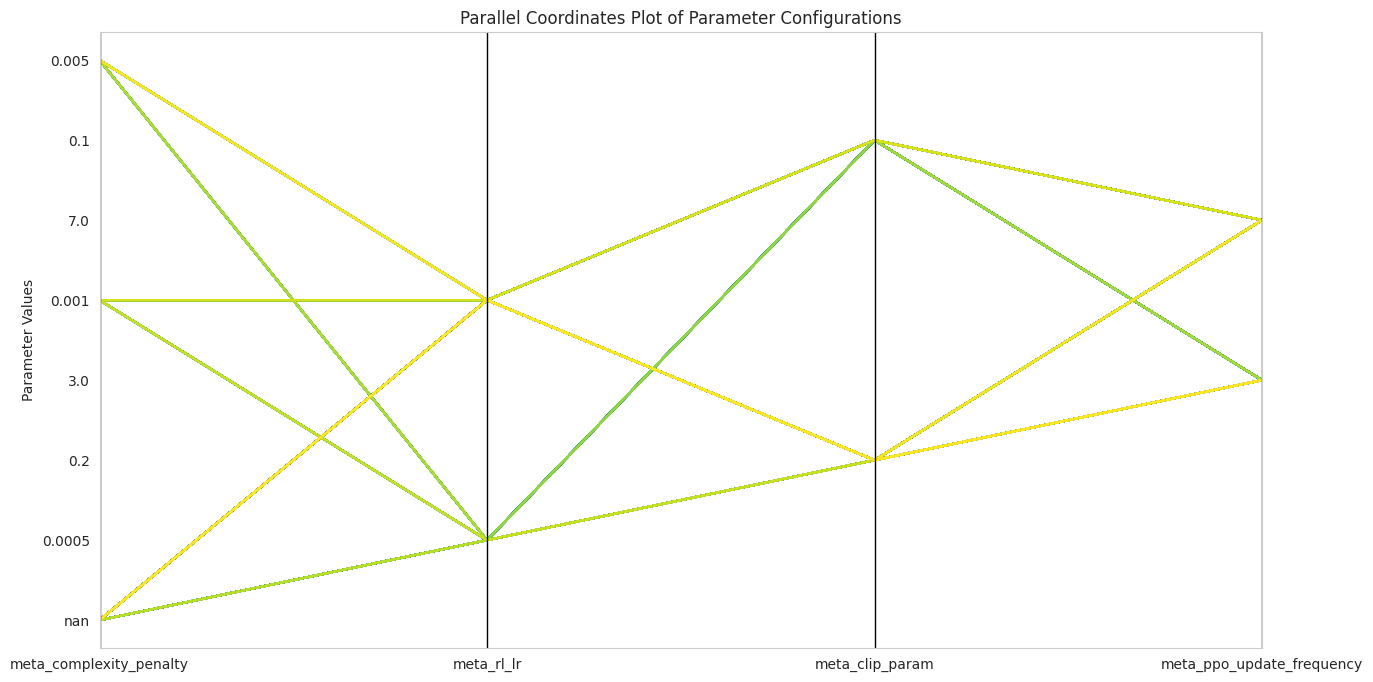

In [633]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming 'combined_df' is your DataFrame and 'psnr_distance' is computed

# Normalize PSNR distance for coloring
combined_df['normalized_psnr_distance'] = (combined_df['psnr_distance'] - combined_df['psnr_distance'].min()) / (combined_df['psnr_distance'].max() - combined_df['psnr_distance'].min())

# Select parameters and PSNR distance
parameters = ['meta_complexity_penalty', 'meta_rl_lr', 'meta_clip_param', 'meta_ppo_update_frequency']
df_plot = combined_df[parameters + ['psnr_distance']].copy()

# Convert categorical parameters to strings
for col in parameters:
    df_plot[col] = df_plot[col].astype(str)

# Create the parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(df_plot, class_column='psnr_distance', colormap='viridis')
plt.title('Parallel Coordinates Plot of Parameter Configurations')
plt.ylabel('Parameter Values')
plt.legend([],[], frameon=False)  # Remove legend for clarity
plt.show()



In [634]:
# Sort DataFrame by PSNR distance
combined_df_sorted = combined_df.sort_values('psnr_distance')

# Display top configurations
top_configs = combined_df_sorted[['meta_complexity_penalty', 'meta_rl_lr', 'meta_clip_param', 'meta_ppo_update_frequency', 'psnr_distance']].head(100)
print(top_configs)

     meta_complexity_penalty  meta_rl_lr  meta_clip_param  \
380                    0.001      0.0010              0.1   
293                    0.001      0.0010              0.2   
322                      NaN      0.0010              0.1   
266                      NaN      0.0005              0.1   
247                    0.005      0.0005              0.1   
..                       ...         ...              ...   
198                    0.005      0.0010              0.1   
14                       NaN      0.0005              0.1   
70                       NaN      0.0010              0.1   
45                       NaN      0.0005              0.1   
138                    0.001      0.0010              0.1   

     meta_ppo_update_frequency  psnr_distance  
380                        7.0       0.001664  
293                        3.0       0.004057  
322                        3.0       0.006360  
266                        3.0       0.007836  
247                        

In [635]:
# Create bins for 'psnr_distance' (e.g., quantiles)
df_plot['psnr_distance_binned'] = pd.qcut(combined_df['psnr_distance'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare DataFrame for plotting
parameters = ['meta_complexity_penalty', 'meta_rl_lr', 'meta_clip_param', 'meta_ppo_update_frequency']
df_plot = combined_df[parameters + ['psnr_distance_binned']].copy()

# Convert parameters to strings
for col in parameters:
    df_plot[col] = df_plot[col].astype(str)

# Plot using binned PSNR distance for coloring
plt.figure(figsize=(15, 8))
parallel_coordinates(df_plot, class_column='psnr_distance_binned', colormap='viridis')
plt.title('Parallel Coordinates Plot with Binned PSNR Distance')
plt.ylabel('Parameter Values')
plt.legend(title='PSNR Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyError: "['psnr_distance_binned'] not in index"

In [ ]:
# Include 'psnr_distance' as an axis
parameters = ['meta_complexity_penalty', 'meta_rl_lr', 'meta_clip_param', 'meta_ppo_update_frequency', 'psnr_distance']
df_plot = combined_df[parameters].copy()

# Convert categorical parameters to strings (excluding 'psnr_distance')
for col in parameters[:-1]:
    df_plot[col] = df_plot[col].astype(str)

# Plot without specifying 'class_column'
plt.figure(figsize=(15, 8))
parallel_coordinates(df_plot, class_column=None, colormap='viridis')
plt.title('Parallel Coordinates Plot with PSNR Distance as an Axis')
plt.ylabel('Parameter Values')
plt.legend([], [], frameon=False)  # Remove legend for clarity
plt.show()

KeyError: None

<Figure size 1500x800 with 0 Axes>